In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e96dc35615d362d688c62602aa2e37d4


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + " "
city_weather = requests.get(city_url)
city_weather.json()

{'cod': '404', 'message': 'city not found'}

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50 using for i in 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

36 of Set 3 | tazovskiy
Processing Record 37 of Set 3 | port elizabeth
Processing Record 38 of Set 3 | port hardy
Processing Record 39 of Set 3 | marcona
City not found. Skipping...
Processing Record 40 of Set 3 | cidreira
Processing Record 41 of Set 3 | utiroa
City not found. Skipping...
Processing Record 42 of Set 3 | scarborough
Processing Record 43 of Set 3 | bluff
Processing Record 44 of Set 3 | belaya gora
Processing Record 45 of Set 3 | ulaangom
Processing Record 46 of Set 3 | esso
Processing Record 47 of Set 3 | pecos
Processing Record 48 of Set 3 | mizan teferi
Processing Record 49 of Set 3 | bengkulu
Processing Record 50 of Set 3 | shelton
Processing Record 1 of Set 4 | bowen
Processing Record 2 of Set 4 | katangli
Processing Record 3 of Set 4 | hobyo
Processing Record 4 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 4 | nizhniy ingash
Processing Record 6 of Set 4 | northam
Processing Record 7 of Set 4 | karratha
Processing Record 8 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,49.48,94,100,8.10,NZ,2021-05-30 18:24:36
1,Albany,42.6001,-73.9662,49.35,91,100,5.73,US,2021-05-30 18:20:28
2,Hilo,19.7297,-155.0900,86.29,75,40,5.75,US,2021-05-30 18:24:36
3,Pevek,69.7008,170.3133,38.61,69,0,5.12,RU,2021-05-30 18:24:36
4,Mandalgovi,45.7625,106.2708,38.91,67,82,20.40,MN,2021-05-30 18:24:36
5,Rikitea,-23.1203,-134.9692,74.77,77,100,13.87,PF,2021-05-30 18:24:37
6,Punta Arenas,-53.1500,-70.9167,37.51,56,75,8.90,CL,2021-05-30 18:24:37
7,Kapaa,22.0752,-159.3190,79.20,72,1,3.89,US,2021-05-30 18:24:37
8,Hermanus,-34.4187,19.2345,56.89,82,81,4.59,ZA,2021-05-30 18:24:37
9,Upernavik,72.7868,-56.1549,31.91,94,100,6.71,GL,2021-05-30 18:22:42


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed",]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-05-30 18:24:36,-46.2817,169.8464,49.48,94,100,8.10
1,Albany,US,2021-05-30 18:20:28,42.6001,-73.9662,49.35,91,100,5.73
2,Hilo,US,2021-05-30 18:24:36,19.7297,-155.0900,86.29,75,40,5.75
3,Pevek,RU,2021-05-30 18:24:36,69.7008,170.3133,38.61,69,0,5.12
4,Mandalgovi,MN,2021-05-30 18:24:36,45.7625,106.2708,38.91,67,82,20.40


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting. as ndarrays
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

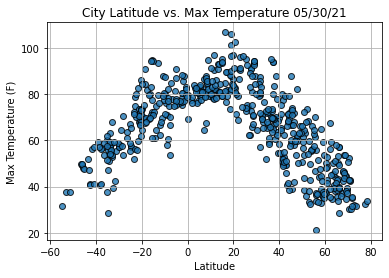

In [15]:
# the following code is to create a scatter plot for the latitude vs. maximum temperature.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

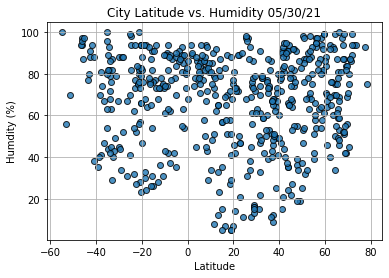

In [16]:
# the following code is to create a scatter plot for the latitude vs. humidity.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

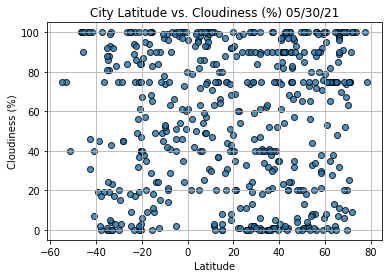

In [17]:
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

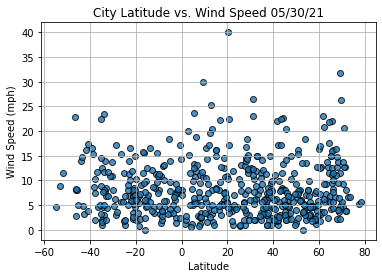

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
#Import linregress
import scipy
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates,):

    # Run line regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
city_data_df.head()
#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

city_data_df["Lat"] >= 0

#use the loc method on the city_data_df DataFrame to return a dataframe of latitudes greater than or equal to 0 . Inside the brackets,add the conditional filter city_data_df["Lat"] >= 0 

city_data_df.loc[(city_data_df["Lat"] >= 0)]



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2021-05-30 18:20:28,42.6001,-73.9662,49.35,91,100,5.73
2,Hilo,US,2021-05-30 18:24:36,19.7297,-155.0900,86.29,75,40,5.75
3,Pevek,RU,2021-05-30 18:24:36,69.7008,170.3133,38.61,69,0,5.12
4,Mandalgovi,MN,2021-05-30 18:24:36,45.7625,106.2708,38.91,67,82,20.40
7,Kapaa,US,2021-05-30 18:24:37,22.0752,-159.3190,79.20,72,1,3.89
...,...,...,...,...,...,...,...,...,...
537,Hovd,MN,2021-05-30 18:22:50,48.0056,91.6419,50.27,34,0,2.26
539,Ust-Kut,RU,2021-05-30 18:26:38,56.7938,105.7672,33.28,85,99,1.90
540,Jiangyou,CN,2021-05-30 18:26:38,31.7667,104.7167,71.98,74,89,2.06
541,Sangueya,GN,2021-05-30 18:26:38,10.7000,-14.3667,85.66,48,47,10.51


In [36]:

# assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression. take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

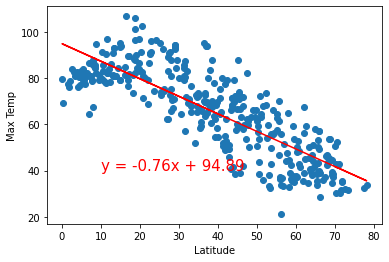

In [62]:
# Linear regression on the Northern Hemisphere 
# call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',"Max Temp",(10,40))


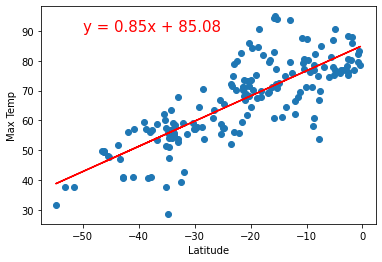

In [60]:
# Linear regression on the Southern Hemisphere Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

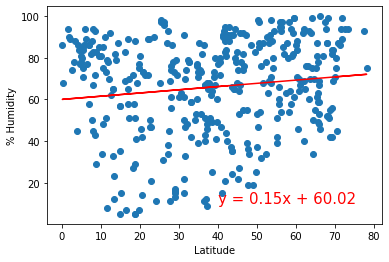

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

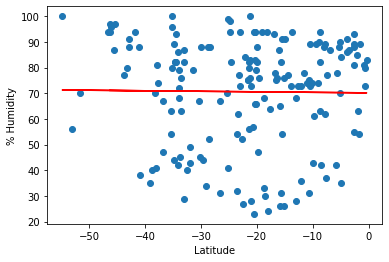

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

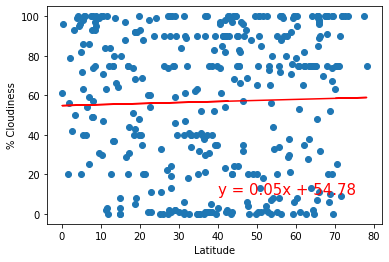

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness', (40,10))

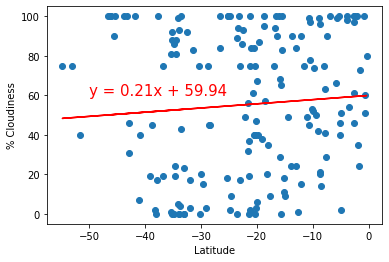

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

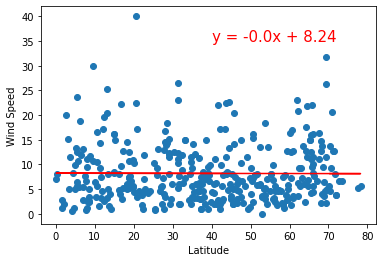

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

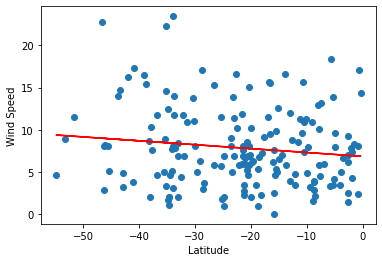

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,35))